## Implementing and Evaluating Logistic Regression, KNNs, and Decision Tree

### 1. Import Libreries:

In [1]:
# Data manipulation libraries
import numpy as np
import pandas as pd
# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Data Modeling Libraries
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### 2. Load Data:

In [2]:
cols_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
data = pd.read_csv('iris-data.csv', names=cols_names)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


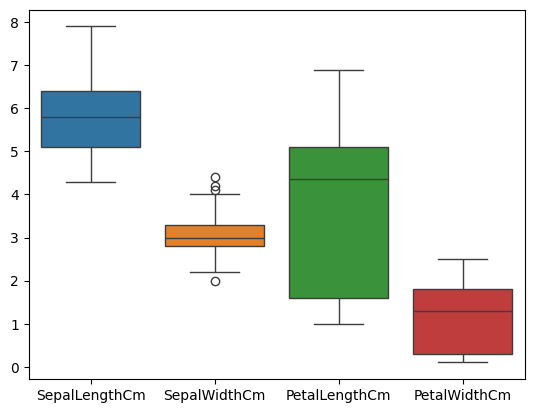

In [5]:
sns.boxplot(data)
plt.show()

In [6]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

##### Insights:
- Our data has 5 columns, 4 as a measures sepals and petals for iris plant, and the fifth columns for the Species (our target value).
- We have 3 species (setosa, versicolor, virginica), and 50 rows for each (balanced dataset).
- We haven't any missing data.
- We haven't inconsistent data or outliers.

### 3. Train test split:

In [7]:
# Split dependent and independant variables:
y = data['Species']
X = data.drop(columns=['Species'])

In [8]:
# Encode the target value as int:
species_map = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
y = y.map(lambda x: species_map[x])

In [9]:
# Split data to train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [10]:
# Standardize features:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4. Logistic Regression:

#### 4.1 Train:

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

#### 4.2 Model Evaluation:

In [12]:
log_reg_train_predict = log_reg.predict(X_train)
log_reg_test_predict = log_reg.predict(X_test)

In [13]:
log_reg_train_predict_acc = accuracy_score(y_train, log_reg_train_predict)
log_reg_test_predict_acc = accuracy_score(y_test, log_reg_test_predict)
log_reg_train_predict_f1 = f1_score(y_train, log_reg_train_predict, average='weighted')
log_reg_test_predict_f1 = f1_score(y_test, log_reg_test_predict, average='weighted')
log_reg_train_predict_precision = precision_score(y_train, log_reg_train_predict, average='weighted')
log_reg_test_predict_precision = precision_score(y_test, log_reg_test_predict, average='weighted')
log_reg_train_predict_recall = recall_score(y_train, log_reg_train_predict, average='weighted')
log_reg_test_predict_recall = recall_score(y_test, log_reg_test_predict, average='weighted')

In [14]:
print(f"Logistic Regression Train Accuracy: {log_reg_train_predict_acc}")
print(f"Logistic Regression Test Accuracy: {log_reg_test_predict_acc}")
print(f"Logistic Regression Train f1 score: {log_reg_train_predict_f1}")
print(f"Logistic Regression Test f1 score: {log_reg_test_predict_f1}")
print(f"Logistic Regression Train precision: {log_reg_train_predict_precision}")
print(f"Logistic Regression Test precision: {log_reg_test_predict_precision}")
print(f"Logistic Regression Train recall: {log_reg_train_predict_recall}")
print(f"Logistic Regression Test recall: {log_reg_test_predict_recall}")

Logistic Regression Train Accuracy: 0.9583333333333334
Logistic Regression Test Accuracy: 0.9333333333333333
Logistic Regression Train f1 score: 0.9583268218992551
Logistic Regression Test f1 score: 0.9333333333333333
Logistic Regression Train precision: 0.9585157390035438
Logistic Regression Test precision: 0.9333333333333333
Logistic Regression Train recall: 0.9583333333333334
Logistic Regression Test recall: 0.9333333333333333


Text(0.5, 1.0, 'Confusion Matrix:')

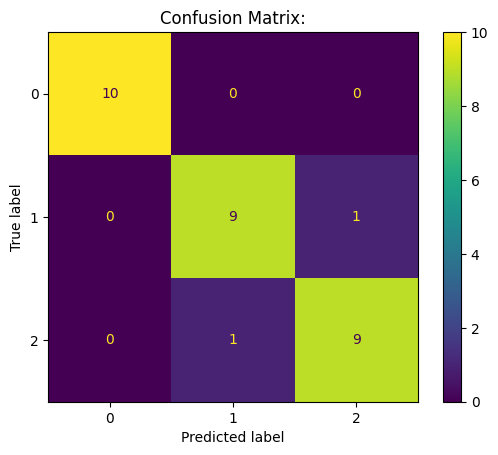

In [15]:
cm = confusion_matrix(y_test, log_reg_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
disp.plot()
disp.ax_.set_title(f"Confusion Matrix:")

### 5. Decision Tree:

#### 5.1 Train:

In [16]:
DT = DecisionTreeClassifier(max_depth=3, random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

#### 5.2 Model Evaluation:

In [17]:
DT_train_predict = DT.predict(X_train)
DT_test_predict = DT.predict(X_test)

In [18]:
DT_train_predict_acc = accuracy_score(y_train, DT_train_predict)
DT_test_predict_acc = accuracy_score(y_test, DT_test_predict)
DT_train_predict_f1 = f1_score(y_train, DT_train_predict, average='weighted')
DT_test_predict_f1 = f1_score(y_test, DT_test_predict, average='weighted')
DT_train_predict_precision = precision_score(y_train, DT_train_predict, average='weighted')
DT_test_predict_precision = precision_score(y_test, DT_test_predict, average='weighted')
DT_train_predict_recall = recall_score(y_train, DT_train_predict, average='weighted')
DT_test_predict_recall = recall_score(y_test, DT_test_predict, average='weighted')

In [19]:
print(f"Decision Tree Train Accuracy: {DT_train_predict_acc}")
print(f"Decision Tree Test Accuracy: {DT_test_predict_acc}")
print(f"Decision Tree Train f1 score: {DT_train_predict_f1}")
print(f"Decision Tree Test f1 score: {DT_test_predict_f1}")
print(f"Decision Tree Train precision: {DT_train_predict_precision}")
print(f"Decision Tree Test precision: {DT_test_predict_precision}")
print(f"Decision Tree Train recall: {DT_train_predict_recall}")
print(f"Decision Tree Test recall: {DT_test_predict_recall}")

Decision Tree Train Accuracy: 0.9833333333333333
Decision Tree Test Accuracy: 0.9666666666666667
Decision Tree Train f1 score: 0.9833229101521785
Decision Tree Test f1 score: 0.9665831244778613
Decision Tree Train precision: 0.9841269841269842
Decision Tree Test precision: 0.9696969696969696
Decision Tree Train recall: 0.9833333333333333
Decision Tree Test recall: 0.9666666666666667


Text(0.5, 1.0, 'Confusion Matrix:')

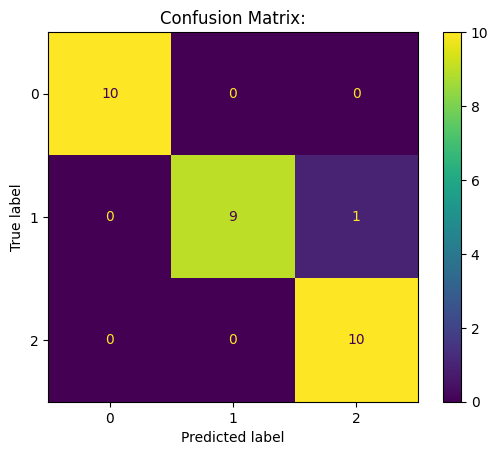

In [20]:
cm = confusion_matrix(y_test, DT_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
disp.plot()
disp.ax_.set_title(f"Confusion Matrix:")

### 6. KNNs:

#### 6.1 Train:

In [21]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

#### 6.2 Model Evaluation:

In [22]:
knn_train_predict = knn.predict(X_train)
knn_test_predict = knn.predict(X_test)

In [23]:
knn_train_predict_acc = accuracy_score(y_train, knn_train_predict)
knn_test_predict_acc = accuracy_score(y_test, knn_test_predict)
knn_train_predict_f1 = f1_score(y_train, knn_train_predict, average='weighted')
knn_test_predict_f1 = f1_score(y_test, knn_test_predict, average='weighted')
knn_train_predict_precision = precision_score(y_train, knn_train_predict, average='weighted')
knn_test_predict_precision = precision_score(y_test, knn_test_predict, average='weighted')
knn_train_predict_recall = recall_score(y_train, knn_train_predict, average='weighted')
knn_test_predict_recall = recall_score(y_test, knn_test_predict, average='weighted')

In [24]:
print(f"KNNs Train Accuracy: {knn_train_predict_acc}")
print(f"KNNs Test Accuracy: {knn_test_predict_acc}")
print(f"KNNs Train f1 score: {knn_train_predict_f1}")
print(f"KNNs Test f1 score: {knn_test_predict_f1}")
print(f"KNNs Train precision: {knn_train_predict_precision}")
print(f"KNNs Test precision: {knn_test_predict_precision}")
print(f"KNNs Train recall: {knn_train_predict_recall}")
print(f"KNNs Test recall: {knn_test_predict_recall}")

KNNs Train Accuracy: 0.9583333333333334
KNNs Test Accuracy: 0.9666666666666667
KNNs Train f1 score: 0.9582746570698378
KNNs Test f1 score: 0.9665831244778613
KNNs Train precision: 0.9599832390530064
KNNs Test precision: 0.9696969696969696
KNNs Train recall: 0.9583333333333334
KNNs Test recall: 0.9666666666666667


Text(0.5, 1.0, 'Confusion Matrix:')

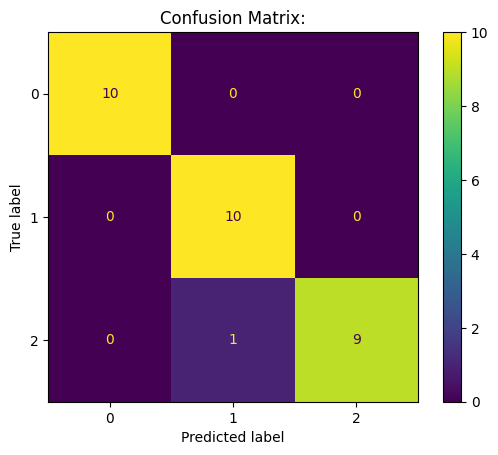

In [25]:
cm = confusion_matrix(y_test, knn_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
disp.plot()
disp.ax_.set_title(f"Confusion Matrix:")

### 7. Compare Models Performance:

In [26]:
models_performance = pd.DataFrame({
    "Model": ['Linear Regression', 'Decision Tree', 'KNNs'],
    "Accuarcy": [log_reg_test_predict_acc, DT_test_predict_acc, knn_test_predict_acc],
    "Percision": [log_reg_test_predict_precision, DT_test_predict_precision, knn_test_predict_precision],
    "Recall": [log_reg_test_predict_recall, DT_test_predict_recall, knn_test_predict_recall],
    "F1": [log_reg_test_predict_f1, DT_test_predict_f1, knn_test_predict_f1]
})
models_performance.head()

,Model,Accuarcy,Percision,Recall,F1
0,Linear Regression,0.933333,0.933333,0.933333,0.933333
1,Decision Tree,0.966667,0.969697,0.966667,0.966583
2,KNNs,0.966667,0.969697,0.966667,0.966583


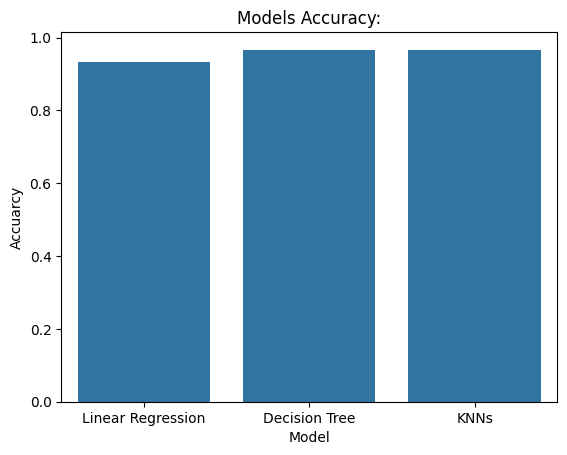

In [27]:
sns.barplot(models_performance, x='Model', y='Accuarcy')
plt.title("Models Accuracy:")
plt.show()

There isn't difference between Accuarcy, f1, precision, recall, Because our target variable classs balanced.

### 8. Save Summary Table:

In [28]:
models_performance.to_excel('summary_table.xlsx', index=False)